# Linear Modeling

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [18]:
#Reading in dataframe
df = pd.read_csv('../data/nyc_taxi_records.csv')

#Setting the req_index column as the index
df.set_index('req_index', inplace=True)

#Converting the index to datetime
df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')

#Checking the dtypes
df.dtypes

PULocationID            float64
DOLocationID            float64
trip_miles              float64
base_passenger_fare     float64
tips                    float64
driver_pay              float64
congestion_surcharge    float64
req_time                 object
req_date                 object
pickup_time              object
dropoff_date             object
dropoff_time             object
temp                    float64
preciptype                int64
zone                     object
borough                   int64
tips_driver_pay         float64
trip_duration             int64
month                     int64
day                       int64
borough_name             object
dtype: object

In [19]:
#Creating a df by week
df_weekly = df['tips_driver_pay'].resample('W').mean()
by_week = pd.DataFrame(df_weekly)

#by_day
by_day = df['tips_driver_pay'].resample("D").mean()
by_day = pd.DataFrame(by_day)

#by_month
by_month = df['tips_driver_pay'].resample("ME").mean()
by_month = pd.DataFrame(by_month)

In [20]:
#building a dataset to build a machine learning model later ona
week = pd.DataFrame()
day = pd.DataFrame()
month = pd.DataFrame()

In [51]:
#Setting up for linear weekly predictions

week['rev'] = by_week['tips_driver_pay']
week['rev_lag1'] = by_week['tips_driver_pay'].shift(1)
week['rev_lag2'] = by_week['tips_driver_pay'].shift(2)
week['monthly_4'] = by_week['tips_driver_pay'].shift(4)
week['time'] = range(0, week.shape[0])

week.head()

,rev,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-01-09,16.237668,NaN,NaN,NaN,0
2022-01-16,16.737110,16.237668,NaN,NaN,1
2022-01-23,16.012501,16.737110,16.237668,NaN,2
2022-01-30,17.151339,16.012501,16.737110,NaN,3
2022-02-06,17.283332,17.151339,16.012501,16.237668,4


In [52]:
week.tail()

,rev,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-12-04,19.038817,17.554353,19.905847,19.445485,47
2022-12-11,21.921971,19.038817,17.554353,21.277740,48
2022-12-18,22.419208,21.921971,19.038817,19.905847,49
2022-12-25,19.893607,22.419208,21.921971,17.554353,50
2023-01-01,18.938749,19.893607,22.419208,19.038817,51


In [54]:
# Generate train/test split
X_train, X_test, y_train, y_test = train_test_split(week.dropna().drop(columns = 'rev'),
                                                    week.dropna()['rev'],
                                                    test_size = 0.2,
                                                    shuffle = False)


In [55]:
# Check shape to confirm did this properly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 4)
(9, 4)
(35,)
(9,)


In [56]:
#Adding an intercept

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

,const,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-02-06,1.0,17.151339,16.012501,16.237668,4
2022-02-13,1.0,17.283332,17.151339,16.737110,5
2022-02-20,1.0,19.011998,17.283332,16.012501,6
2022-02-27,1.0,16.940486,19.011998,17.151339,7
2022-03-06,1.0,17.577946,16.940486,17.283332,8


In [57]:
#Instantiating and passing in model/data
lm = sm.OLS(y_train, X_train)

# Fitting the model
lm_result = lm.fit()

In [58]:
#Taking a look at the summary
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    rev   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5.350
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00225
Time:                        14:38:01   Log-Likelihood:                -51.717
No. Observations:                  35   AIC:                             113.4
Df Residuals:                      30   BIC:                             121.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3928      3.610      2.602      0.0

In [61]:
#Making predictions
lm_result.predict(X_test)

req_index
2022-11-06    21.663979
2022-11-13    21.153427
2022-11-20    20.909733
2022-11-27    21.213718
2022-12-04    20.165120
2022-12-11    20.154984
2022-12-18    20.874038
2022-12-25    21.353285
2023-01-01    21.187639
dtype: float64

In [63]:
#Calculating r2 score
r2_score(y_test, lm_result.predict(X_test))

-0.7060023593442912

In [65]:
# Calculating RMSE
mean_squared_error(y_test, lm_result.predict(X_test)) ** 0.5

1.9236085529332185

Text(0.5, 1.0, 'Forecasting Weekly Average Driver Revenue Per Trip')

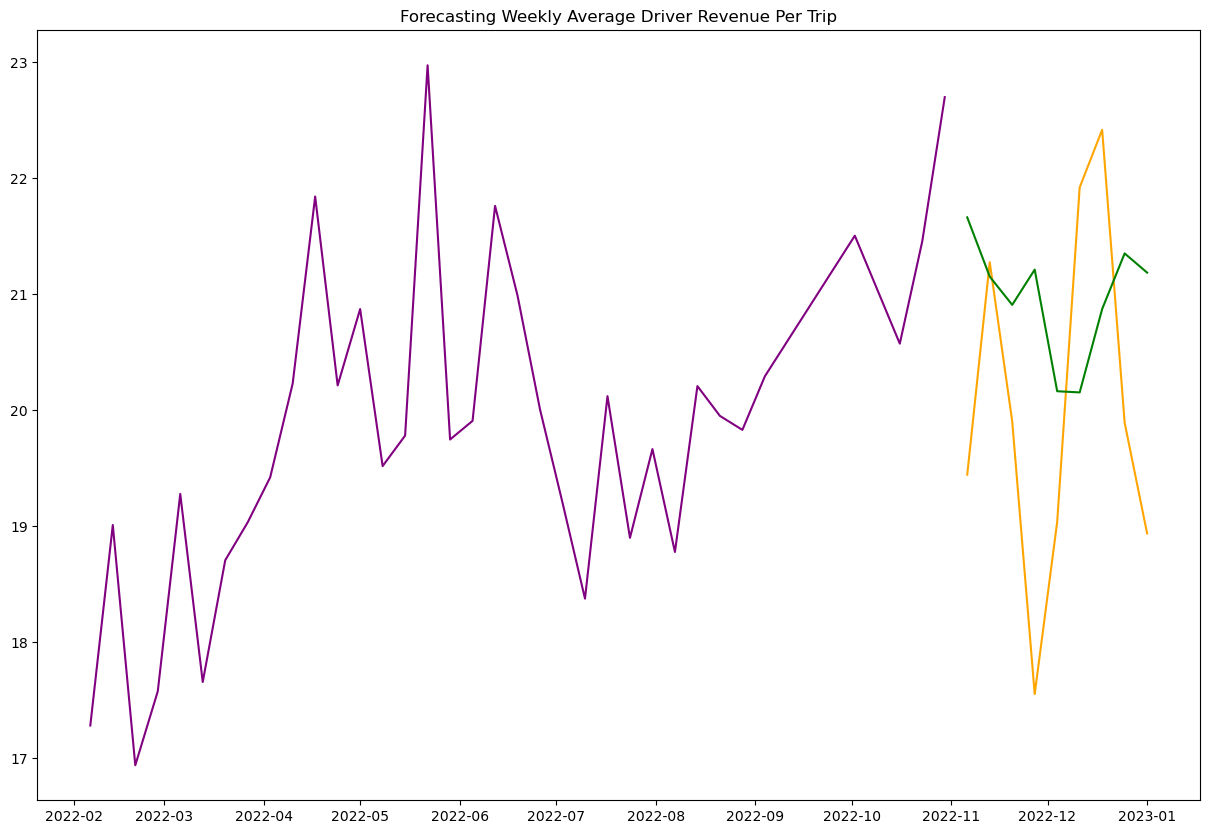

In [66]:
#Plotting Weekly Predictions

plt.figure(figsize=(15, 10))

#Plotting training data
plt.plot(y_train.index, y_train.values, color = 'purple')

# Plotting testing data
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plotting predicted test values
plt.plot(lm_result.predict(X_test), color = 'green')

#Creating the title
plt.title('Forecasting Weekly Average Driver Revenue Per Trip')



In [67]:
#Setting up for linear weekly predictions

day['rev'] = by_day['tips_driver_pay']
day['rev_lag1'] = by_day['tips_driver_pay'].shift(1)
day['rev_lag2'] = by_day['tips_driver_pay'].shift(2)
day['monthly_4'] = by_day['tips_driver_pay'].shift(7)
day['time'] = range(0, day.shape[0])

day.head()

,rev,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-01-04,16.947475,NaN,NaN,NaN,0
2022-01-05,NaN,16.947475,NaN,NaN,1
2022-01-06,16.562685,NaN,16.947475,NaN,2
2022-01-07,NaN,16.562685,NaN,NaN,3
2022-01-08,15.202156,NaN,16.562685,NaN,4


In [68]:
day.tail()

,rev,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-12-27,18.339457,NaN,17.712602,20.560105,357
2022-12-28,NaN,18.339457,NaN,NaN,358
2022-12-29,19.013563,NaN,18.339457,24.136857,359
2022-12-30,NaN,19.013563,NaN,17.159573,360
2022-12-31,19.462549,NaN,19.013563,NaN,361


In [69]:
# Generate train/test split
X_train, X_test, y_train, y_test = train_test_split(day.fillna().drop(columns = 'rev'),
                                                    day.dropna()['rev'],
                                                    test_size = 0.2,
                                                    shuffle = False)


# Check shape to confirm did this properly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5, 4)
(2, 4)
(5,)
(2,)


In [70]:
#Adding an intercept

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

,const,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-02-06,1.0,18.250065,17.865497,17.206103,33
2022-04-05,1.0,19.035280,19.241920,18.557949,91
2022-10-31,1.0,22.161496,22.246776,23.200478,300
2022-11-14,1.0,18.219533,20.070618,21.959846,314
2022-11-21,1.0,18.247918,19.950886,18.246309,321


In [71]:
# Dropping NAs so I can pass data through stats model, ensuring y_train only keeps indexes from X_train

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_train.head()

,const,rev_lag1,rev_lag2,monthly_4,time
req_index,,,,,
2022-02-06,1.0,18.250065,17.865497,17.206103,33
2022-04-05,1.0,19.035280,19.241920,18.557949,91
2022-10-31,1.0,22.161496,22.246776,23.200478,300
2022-11-14,1.0,18.219533,20.070618,21.959846,314
2022-11-21,1.0,18.247918,19.950886,18.246309,321


In [72]:
#Instantiating and passing in model/data
lm_day = sm.OLS(y_train, X_train)

# Fitting the model
lm_day_result = lm_day.fit()

In [73]:
#Taking a look at the summary
print(lm_day_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    rev   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                nan
Time:                        15:27:52   Log-Likelihood:                 141.30
No. Observations:                   5   AIC:                            -272.6
Df Residuals:                       0   BIC:                            -274.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4854        inf         -0        n

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
